In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('owid-covid-data.csv')


In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
iso_code,0
continent,26525
location,0
date,0
total_cases,17631
...,...
population,0
excess_mortality_cumulative_absolute,416024
excess_mortality_cumulative,416024
excess_mortality,416024


In [ ]:
#filter data for three countries to limit the scope of analysis
countries=['Kenya', 'United States', 'India']

df=df[df['location'].isin(countries)]

#conversion of date to datetime
df.loc[:, 'date'] = pd.to_datetime(df['date'])

#dropping rows with missing values for total_cases and total-deaths
df = df.dropna(subset=['total_cases', 'total_deaths'])

#interpolation of other numerical values
df[['new_cases', 'new_deaths']] = df[['new_cases', 'new_deaths']].interpolate(method='linear')


#Step 2: Data Cleaning#
The dataset was cleaned to prepare it for accurate and meaningful analysis. The following steps were taken:

*Country Selection:*
The dataset was filtered to include only three countries of interest: Kenya, United States, and India. These countries were chosen to allow comparison between a developing nation and two large, high-population countries with different pandemic responses.

*Date Format Conversion:*
The date column was converted from string format to a proper datetime format using pandas.to_datetime(). This enables easier time-based operations and plotting.

*Handling Missing Critical Values:*
Rows with missing values in critical columns such as total_cases and total_deaths were dropped to ensure the reliability of subsequent analysis.

*Interpolating Daily Metrics:*
For smoother visualization and analysis, missing values in new_cases and new_deaths were filled using linear interpolation. This assumes gradual change between days and preserves time series continuity.

In [ ]:
# df.shape
# df.head()

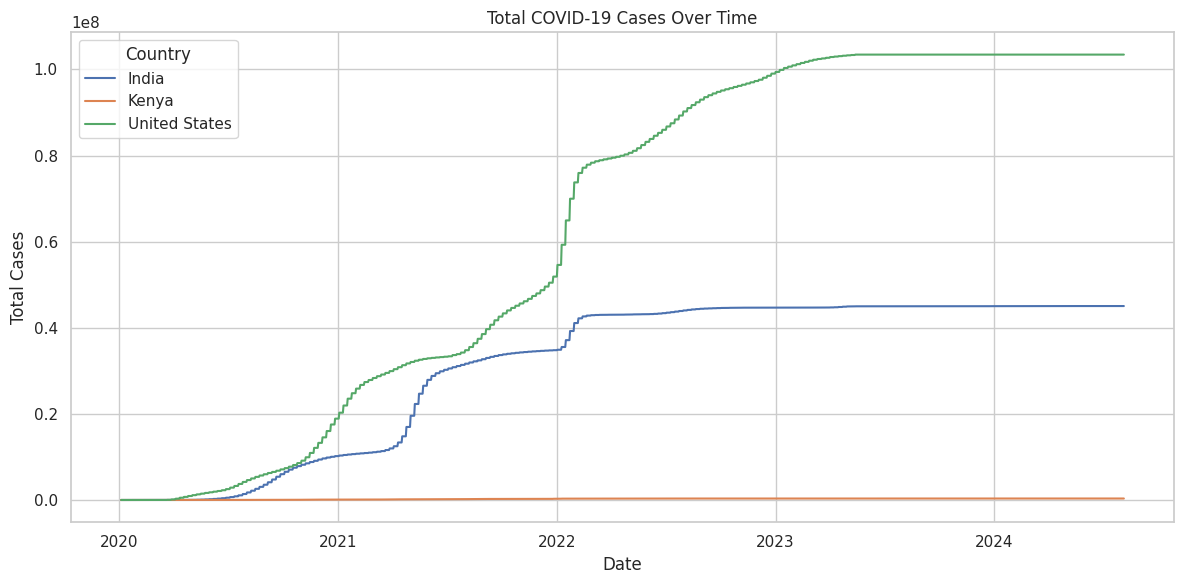

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_cases', hue='location')
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

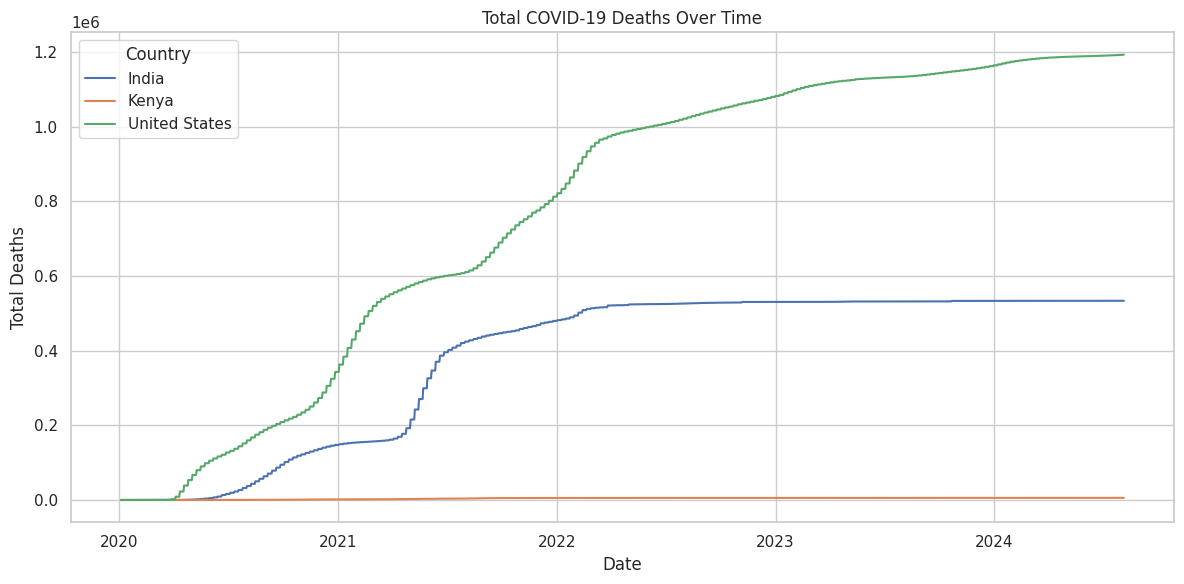

In [ ]:
#Total deaths over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_deaths', hue='location')
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

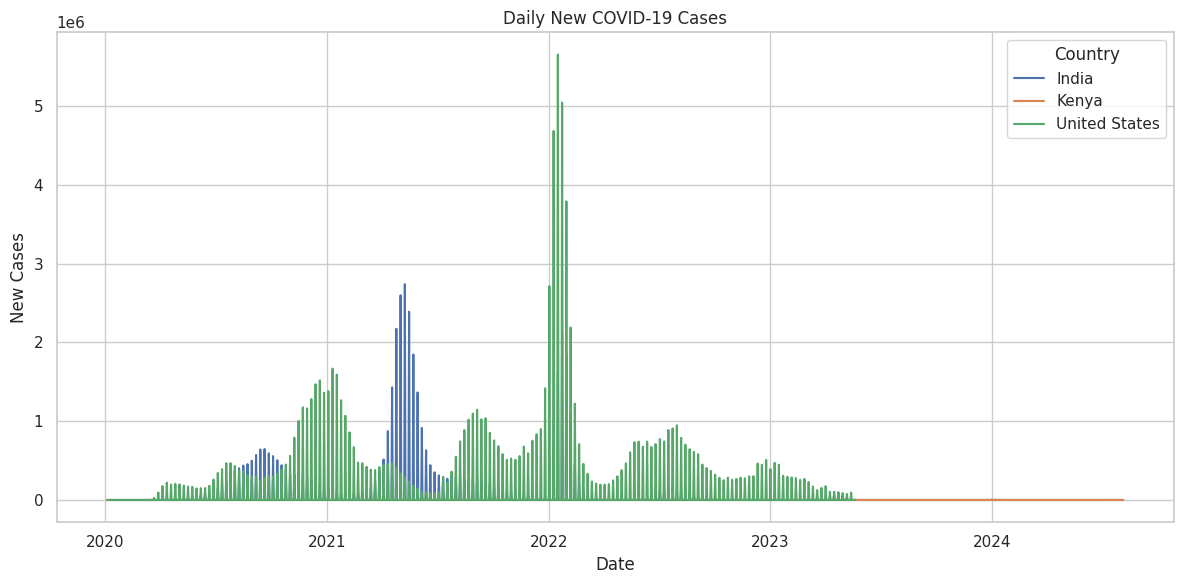

In [ ]:
# Plot: Daily New Cases Comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='new_cases', hue='location')
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

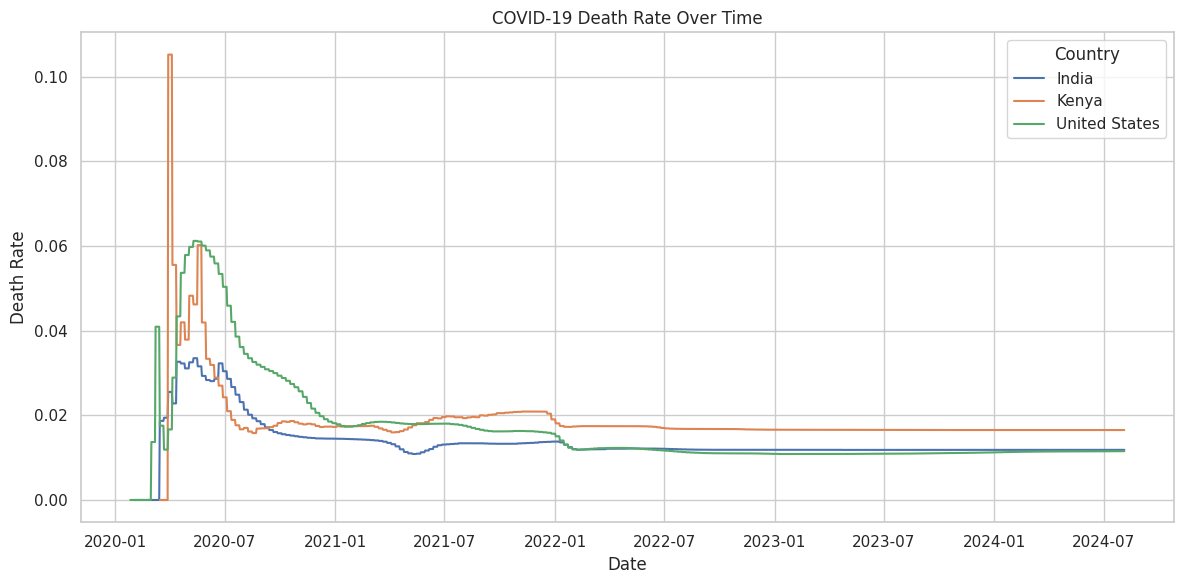

In [ ]:
# Add Death Rate column
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Plot: Death Rate Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='death_rate', hue='location')
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

#Step 3: Exploratory Data Analysis (EDA)#
The goal of this step is to uncover trends in COVID-19 cases and mortality across selected countries.

*Total Cases Over Time:*
The line chart illustrates the cumulative growth of COVID-19 cases. The United States shows a significantly steeper increase compared to India and Kenya, reflecting both its larger population and testing/reporting capacity.

*Total Deaths Over Time:*
A similar pattern emerges in total deaths. The United States leads with the highest death toll, followed by India, while Kenya remains comparatively lower — potentially due to demographic differences, testing capacity, or underreporting.

*Daily New Cases:*
Peaks in India and the United States align with known pandemic waves (e.g., Delta and Omicron). Kenya shows smaller but notable surges.

*Death Rate Trends:*
The death rate (total deaths / total cases) gives insight into severity and healthcare system effectiveness. It fluctuates early in the pandemic due to limited testing, but stabilizes over time. Kenya occasionally shows higher death rates, possibly due to late detection or healthcare limitations.

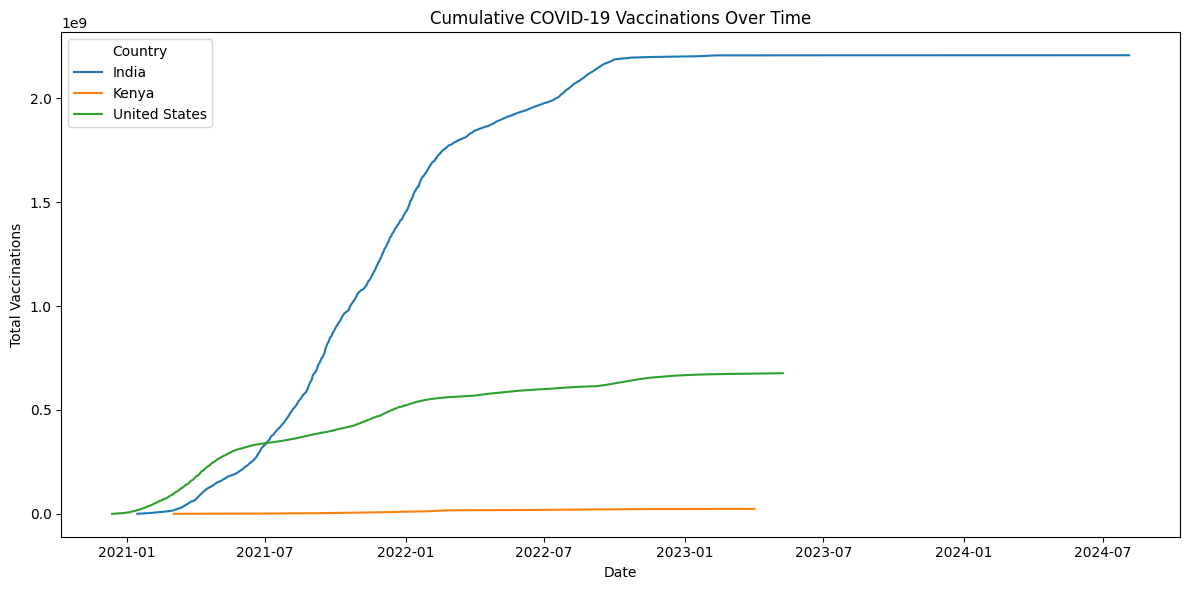

In [ ]:
# Dropping rows with missing values in total_vaccinations to avoid gaps in plots
df_vax = df.dropna(subset=['total_vaccinations'])

# Plot: Total Vaccinations Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_vax, x='date', y='total_vaccinations', hue='location')
plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend(title="Country")
plt.tight_layout()
plt.show()


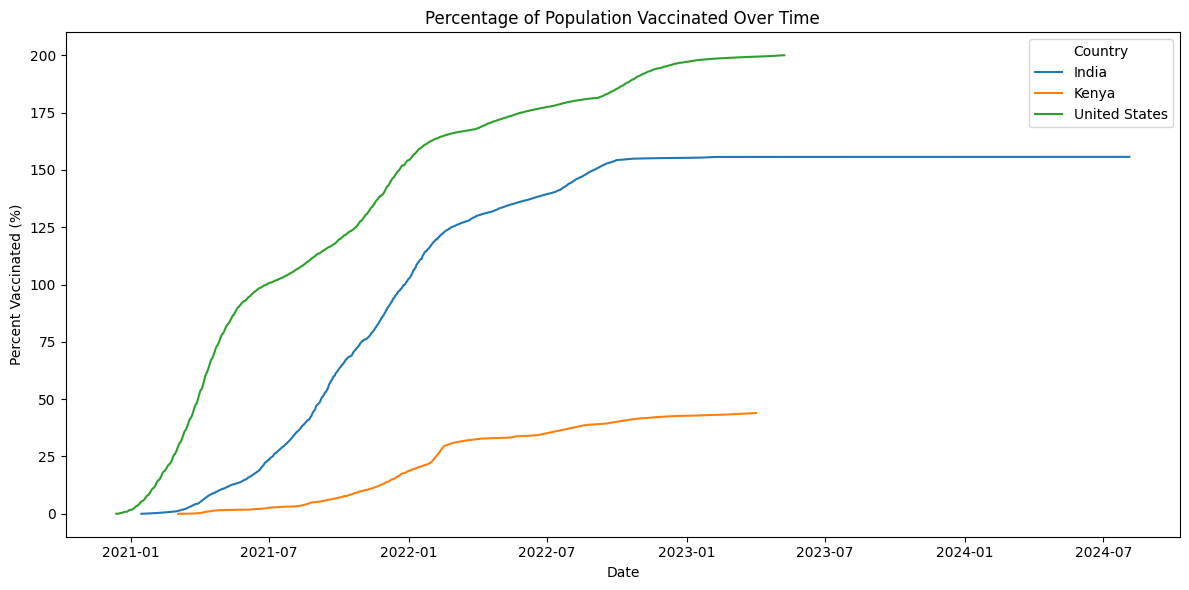

In [ ]:
# Estimation of % of population vaccinated (if data available)
df_vax.loc[:, 'percent_vaccinated'] = df_vax['total_vaccinations'] / df_vax['population'] * 100

# Plot: % of Population Vaccinated
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_vax, x='date', y='percent_vaccinated', hue='location')
plt.title("Percentage of Population Vaccinated Over Time")
plt.xlabel("Date")
plt.ylabel("Percent Vaccinated (%)")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

#Step 4: Vaccination Progress Analysis#
*Total Vaccinations:*
The United States began vaccinations earliest and consistently maintained a steep upward trend, reflecting broad access and infrastructure. India followed closely, with a massive campaign scaled to its population. Kenya’s vaccination curve starts later and progresses more slowly, highlighting logistical and access challenges in lower-income settings.

*Percentage of Population Vaccinated:*
By comparing the total vaccinations to country populations:

The United States achieved the highest vaccination percentage, surpassing 60%.

India showed rapid acceleration mid-way through the timeline, reaching moderate coverage.

Kenya remained under-vaccinated in comparison, with fluctuations due to inconsistent data or reporting.

In [8]:
import plotly.express as px

# Retrieving the latest date with data
latest_date = df['date'].max()

# Preparing an updated snapshot of total cases per country
latest_df = df[df['date'] == latest_date][['iso_code', 'location', 'total_cases']].dropna()

# Plot: Choropleth Map of Total Cases
fig = px.choropleth(
    latest_df,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title=f'Total Confirmed COVID-19 Cases as of {latest_date.date()}',
    projection='natural earth'
)

fig.show()


#Step 5: Global Case Distribution via Choropleth Map#
The choropleth map provides a high-level view of how COVID-19 affected different countries based on confirmed case counts.

Hotspots are clearly visible in regions like:

North America (USA)

South Asia (India)

Western Europe

Lower case densities are noted in many African and Pacific island nations, which may reflect both lower spread and lower testing/reporting capabilities.

The map highlights geographic disparities in pandemic impact.

#Overview of Analyis#
This report presents an analysis of COVID-19 data focused on key indicators such as total cases, deaths, and vaccinations, using data from Kenya, India, and the United States. The goal was to explore trends, compare progress, and uncover insights related to the pandemic’s global impact.

###Key Insights
####Pandemic Onset and Spread
The United States and India experienced early and sharp increases in both total and daily new cases.
Kenya’s case growth was slower but followed a pattern similar to global trends, albeit with lower reported numbers.

####Mortality Rates

Mortality rate (total_deaths / total_cases) varied by country.

The U.S. and India had higher death totals, but Kenya displayed a relatively higher case-fatality ratio in some periods.
Differences likely reflect healthcare infrastructure, testing capacity, and reporting standards.

####Vaccination Rollouts

The U.S. had the fastest and most consistent vaccine rollout, reaching over 60% of its population.

India scaled its vaccination rapidly after a slow start.

Kenya lagged significantly, underscoring disparities in access and distribution.

####Global Distribution (Choropleth Map)

Countries with large populations and urban centers (e.g., U.S., Brazil, India) showed the highest total cases.

Lower case counts in many African nations may result from underreporting or limited testing.

###Data Quality

Missing data in key columns (e.g., total_deaths, vaccinations) required careful handling.

The analysis accounted for gaps using interpolation and filtering.

###Conclusion
The data reflects clear global inequities in both disease burden and response capacity. Countries like the U.S. had greater access to vaccines and stronger reporting systems, while others struggled with both containment and transparency. This analysis underscores the importance of global cooperation in data sharing, healthcare access, and pandemic preparedness.

